### 2014 stats.
Some statistics work for 2014 NC/US TRI data.
Not sure how useful this is, but took a significant amount of time so I'll share it!

In [4]:
%pylab inline
import numpy, csv
import pandas as pd
import matplotlib.pyplot as plt
            
NC14 = pd.read_csv("data\TRI_2014_NC.csv")
NC14.head()


Populating the interactive namespace from numpy and matplotlib


,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER,Unnamed: 109
0,2014,28352LBBYWHWY74,110000710231,PILKINGTON NA,13121 ROCKY FORD RD,LAURINBURG,SCOTLAND,NC,28352,NaN,...,0.0,10413.0,0.0,10934.0,NaN,PRODUCTION,1.13,PILKINGTON N.A. INC,212371884.0,NaN
1,2014,28360LKYST88CAT,110001493090,ELKAY PLUMBING PRODUCTS CO,880 CATON ROAD,LUMBERTON,ROBESON,NC,28360,NaN,...,10214.0,0.0,0.0,10216.0,NaN,PRODUCTION,1.03,ELKAY MANUFACTURING CO,5080429.0,NaN
2,2014,27017WYNFR1018E,110000345109,WAYNE FARMS LLC - DOBSON FRESH PLANT,802 E ATKINS ST,DOBSON,SURRY,NC,27017,NaN,...,0.0,12028.5,0.0,12150.0,NaN,PRODUCTION,1.02,CONTINENTAL GRAIN CO,6982409.0,NaN
3,2014,27107STRHC4000O,110000345458,ARDAGH METAL BEVERAGE USA INC RE: WINSTON SALE...,4000 OLD MILWAUKEE LN,WINSTON SALEM,FORSYTH,NC,27107,NaN,...,0.0,78170.0,0.0,501549.0,NaN,PRODUCTION,1.02,ARDAGH HOLDINGS USA INC,80376954.0,NaN
4,2014,28560WYRHSSTREE,110000350478,INTERNATIONAL PAPER- NEW BERN MILL,1785 WEYERHAEUSER RD,VANCEBORO,CRAVEN,NC,28586,NaN,...,0.0,813521.0,0.0,860796.0,NaN,PRODUCTION,0.95,INTERNATIONAL PAPER CO,1316561.0,NaN


In [5]:
# "cleaning dataset to Food Industry and useful columns
temp=NC14[['INDUSTRY_SECTOR','TOTAL_RELEASES','ON-SITE_RELEASE_TOTAL','OFF-SITE_RELEASE_TOTAL']]
this=temp[temp['INDUSTRY_SECTOR']== 'Food']
NC14=this


In [6]:
#indexing data by industry sector and taking mean of each column
NC14.index = NC14["INDUSTRY_SECTOR"]
NC14.mean()


TOTAL_RELEASES            68956.967930
ON-SITE_RELEASE_TOTAL     68854.018812
OFF-SITE_RELEASE_TOTAL       86.338824
dtype: float64

Mean of total releass and on-site releases are similar while off-site releases are much lower...the mean of off-site releases plus on-site release should be close to total releases which it is

### Median

In the food sector the medians for each category are zero.... This means at least half the facilities have zero toxic releases whatsoever. Good Job!!

In [7]:
#Taking the median of each column
NC14.median() 

TOTAL_RELEASES            0.0
ON-SITE_RELEASE_TOTAL     0.0
OFF-SITE_RELEASE_TOTAL    0.0
dtype: float64

### Measures of spread  
Range of Total release and on-site releases are large because some facilites had zero release both on-site and total, where some facilites had large toxic release and majority on those release coming on the site of the facility. Off-site release range being significally lower shows that the majority of TRI reporting facilites dont have much off-site toxic releases

In [8]:
#measuring the spread of each column, max value - min value
tot=max(NC14["TOTAL_RELEASES"]) - min(NC14["TOTAL_RELEASES"])
ontot=max(NC14["ON-SITE_RELEASE_TOTAL"]) - min(NC14["ON-SITE_RELEASE_TOTAL"])
oftot=max(NC14["OFF-SITE_RELEASE_TOTAL"]) - min(NC14["OFF-SITE_RELEASE_TOTAL"])

print tot
print ontot
print oftot

3669339.0
3668587.0
3061.0


### Quartiles

In [9]:
#taking quartiles of each column
quartiletot = [NC14["TOTAL_RELEASES"].quantile(0),   
            NC14["TOTAL_RELEASES"].quantile(0.25),
            NC14["TOTAL_RELEASES"].quantile(0.50),
            NC14["TOTAL_RELEASES"].quantile(0.75),
            NC14["TOTAL_RELEASES"].quantile(1)]


quartileontot = [NC14["ON-SITE_RELEASE_TOTAL"].quantile(0),   
            NC14["ON-SITE_RELEASE_TOTAL"].quantile(0.25),
            NC14["ON-SITE_RELEASE_TOTAL"].quantile(0.50),
            NC14["ON-SITE_RELEASE_TOTAL"].quantile(0.75),
            NC14["ON-SITE_RELEASE_TOTAL"].quantile(1)]

quartileoftot = [NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0),   
            NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0.25),
            NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0.50),
            NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0.75),
            NC14["OFF-SITE_RELEASE_TOTAL"].quantile(1)]

print quartiletot
print quartileontot
print quartileoftot


[0.0, 0.0, 0.0, 506.01750000000004, 3669339.0]
[0.0, 0.0, 0.0, 250.0, 3668587.0]
[0.0, 0.0, 0.0, 0.0, 3061.0]


In [10]:
NC14["TOTAL_RELEASES"].describe()

count    1.360000e+02
mean     6.895697e+04
std      3.947171e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.060175e+02
max      3.669339e+06
Name: TOTAL_RELEASES, dtype: float64

In [11]:
NC14["ON-SITE_RELEASE_TOTAL"].describe()

count    1.360000e+02
mean     6.885402e+04
std      3.946419e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+02
max      3.668587e+06
Name: ON-SITE_RELEASE_TOTAL, dtype: float64

In [12]:
NC14["OFF-SITE_RELEASE_TOTAL"].describe()

count     136.000000
mean       86.338824
std       414.438069
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3061.000000
Name: OFF-SITE_RELEASE_TOTAL, dtype: float64

### Interquartile (IQR) range

In [13]:
NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0.75)-NC14["OFF-SITE_RELEASE_TOTAL"].quantile(0.25)

0.0

In [14]:
NC14["ON-SITE_RELEASE_TOTAL"].quantile(0.75)-NC14["ON-SITE_RELEASE_TOTAL"].quantile(0.25)

250.0

In [15]:
NC14["TOTAL_RELEASES"].quantile(0.75)-NC14["TOTAL_RELEASES"].quantile(0.25)

506.01750000000004

### Visualization
Total releases

Here we can see that 2 facilities had total releases that exceeded other facilities by a large margin, these facilites skew the mean values drastically although have little to no effect on the median, There also are serveral facilities that had zero total releases that also skews the mean and with the median being zerom over half of the reporting facilities had no releases at all !

On-site release total 
Similar to the total relases plot, the same two facilities with large total relases actually has those toxic releases right on the site of the facility.

Off-site release total
Immdiately you can see that there are much lower values for off site releases, as well as not really any outliers.

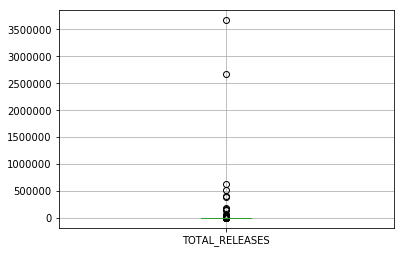

In [16]:
NC14.boxplot(column="TOTAL_RELEASES",
               return_type='axes',
               figsize=(50,50))

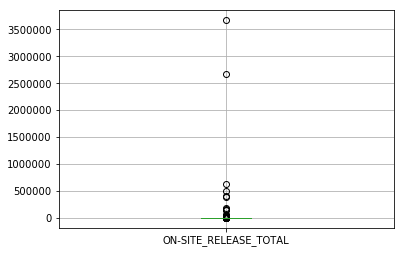

In [17]:
NC14.boxplot(column="ON-SITE_RELEASE_TOTAL",
               return_type='axes',
               figsize=(50,50))

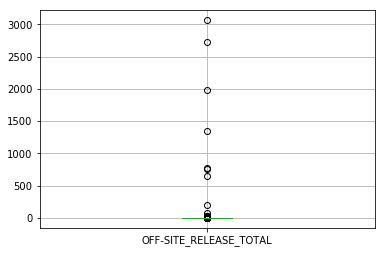

In [18]:
NC14.boxplot(column="OFF-SITE_RELEASE_TOTAL",
               return_type='axes',
               figsize=(50,50))

In [19]:
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display

Ploting Total releases, on-site releases, and off-site releases 
### Cumulative distribution function (CDF)

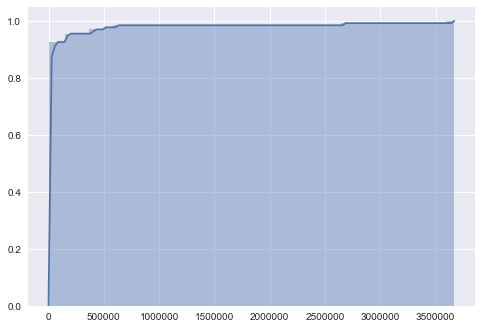

In [20]:
xtotal=stats.uniform.rvs(NC14['TOTAL_RELEASES'])
sns.distplot(xtotal,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [21]:
#CDF for total releases
stats.uniform.cdf(x=1112,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=tot)      # Distribution end
# chance between 0 and x value


0.00030305185756889728

With x = 1112 the input for cdf, as excepted the probably is very low because alot of the total release values are quite high..but then again over half the reporting facilities have zero total releases, so this could be misleading

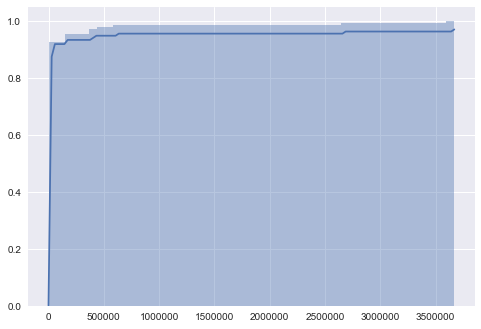

In [22]:
xonsite=stats.uniform.rvs(NC14['ON-SITE_RELEASE_TOTAL'])
sns.distplot(xonsite,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [23]:
#CDF for on-site releases 
stats.uniform.cdf(x=1112,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=ontot)      # Distribution end
# chance between 0 and x value

0.00030311397821559092

With x = 1112 the input for cdf, as excepted the probably is very low because alot of the on-site release values are quite high..but as with total releases over half the reporting facilities have zero on-site releases, so this could be misleading

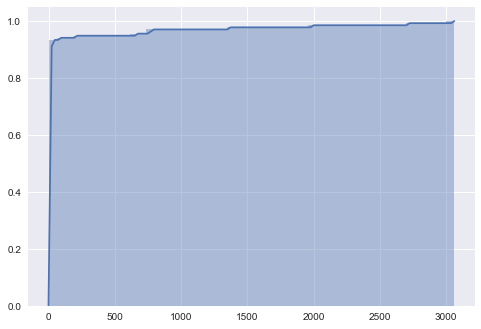

In [24]:
xoffsite=stats.uniform.rvs(NC14['OFF-SITE_RELEASE_TOTAL'])
sns.distplot(xoffsite,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [25]:
#CDF for off-site releases
stats.uniform.cdf(x=1112,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=oftot)      # Distribution end
# chance between 0 and x value

0.36327997386475008

With x = 1112 the input for cdf, the probability for off-site releases is much higher than the total release and on-site predictions with the same x value. This is likely because the range of off-site is much smaller, so a off-site release total is much more likely to fall between 0 and 1112

### Method of Moments

In [26]:
total_mean=NC14['TOTAL_RELEASES'].mean()
total_var=NC14['TOTAL_RELEASES'].var()
print total_mean
print total_var

68956.9679299
1.55801604775e+11


In [27]:
alpha_total = total_mean ** 2 / total_var
beta_total = total_var / total_mean
print alpha_total
print beta_total

0.0305199900408
2259403.35621


In [28]:
onsite_mean=NC14['ON-SITE_RELEASE_TOTAL'].mean()
onsite_var=NC14['ON-SITE_RELEASE_TOTAL'].var()
print onsite_mean
print onsite_var

68854.0188122
1.55742259256e+11


In [29]:
alpha_onsite = onsite_mean ** 2 / onsite_var
beta_onsite = onsite_var / onsite_mean
print alpha_onsite
print beta_onsite

0.0304405235241
2261919.66632


In [30]:
offsite_mean=NC14['OFF-SITE_RELEASE_TOTAL'].mean()
offsite_var=NC14['OFF-SITE_RELEASE_TOTAL'].var()
print offsite_mean
print offsite_var

86.3388235294
171758.913391


In [31]:
alpha_offsite = offsite_mean ** 2 / offsite_var
beta_offsite = offsite_var / offsite_mean
print alpha_offsite
print beta_offsite

0.0434003237518
1989.35897398


North Carolina food industry vs United States food industry

### Null hypothesis
Releases totals in North Carolina are significantly different than the National average

In [34]:
US14 = pd.read_csv("data\TRI_2014_US.csv")
US14.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER,SYS_STSITSSXSOLCHJPSAF7486K4RV,SYS_STSWGMX8O#197_NPUKVK#S5$QM,Unnamed: 111
0,2014,30170WNSLYGEORG,110046233919,WANSLEY STEAM ELECTRIC GENERATING PLANT,1371 LIBERTY CHURCH RD,CARROLLTON,HEARD,GA,30116,NaN,...,0.0,0.0,0.0,NaN,0.00,SOUTHERN CO CO-OWNED,NaN,7404685178570634201,15823560136406999002,NaN
1,2014,83687GRTWS1717E,110000468663,BHS MARKETING LLC,1717 E FARGO AVE.,NAMPA,CANYON,ID,83687,NaN,...,0.0,30566.0,NaN,PRODUCTION,1.00,NaN,NaN,4496232321769466624,6840205277923857774,NaN
2,2014,06516DTSCH14FAR,110000316907,DEITSCH PLASTIC CO INC,14 FARWELL ST,WEST HAVEN,NEW HAVEN,CT,6516,NaN,...,0.0,22054.0,NaN,PRODUCTION,1.07,NaN,NaN,12178759782761333358,11933647990512866808,NaN
3,2014,87045PLNSSCOUNT,110000758797,TRI-STATE GENERATION & TRANSMISSION - ESCALANT...,COUNTY RD 19,PREWITT,MCKINLEY,NM,87045,NaN,...,0.0,56883.0,NaN,PRODUCTION,0.92,NaN,NaN,2379444628039041909,17523950876758001578,NaN
4,2014,53546SSTCH3330P,110001135806,SSI TECHNOLOGIES SINTERED SPEC IALTIES DIV,3330 PALMER DR,JANESVILLE,ROCK,WI,53546,NaN,...,0.0,170713.0,NaN,PRODUCTION,1.03,NaN,NaN,3122245006422871575,4395391234725583800,NaN


In [35]:
tempUS=US14[['INDUSTRY_SECTOR','TOTAL_RELEASES','ON-SITE_RELEASE_TOTAL','OFF-SITE_RELEASE_TOTAL']]
thisUS=tempUS[tempUS['INDUSTRY_SECTOR']== 'Food']
US14=thisUS
US14.head()

,INDUSTRY_SECTOR,TOTAL_RELEASES,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL
37,Food,184840.33,184840.33,0.0
44,Food,15913.20,15913.20,0.0
132,Food,0.00,0.00,0.0
149,Food,15653.00,13164.00,2489.0
151,Food,0.00,0.00,0.0


In [36]:
US14.index = US14["INDUSTRY_SECTOR"]
US14.mean()

TOTAL_RELEASES            37707.000928
ON-SITE_RELEASE_TOTAL     33583.888408
OFF-SITE_RELEASE_TOTAL     3291.649192
dtype: float64

In [37]:
total_USmean=US14['TOTAL_RELEASES'].mean()
onsite_USmean=US14['ON-SITE_RELEASE_TOTAL'].mean()
offsite_USmean=US14['OFF-SITE_RELEASE_TOTAL'].mean()


In [38]:
stats.ttest_1samp(a= NC14['TOTAL_RELEASES'],    # Sample data
                 popmean= total_USmean)  # Pop mean

Ttest_1sampResult(statistic=0.92327920475007297, pvalue=0.35750896442847369)

p-value of .35 is very high, thus we can not reject the null hypothesis with respect to Total releases
so indeed total release value in North Carolina are significantly different than the National average

In [39]:
stats.ttest_1samp(a= NC14['ON-SITE_RELEASE_TOTAL'],    # Sample data
                 popmean= onsite_USmean)  # Pop mean

Ttest_1sampResult(statistic=1.0422533131394476, pvalue=0.29915712081475282)

p-value of .29 is very high, thus we can not reject the null hypothesis with respect to On-site release totals
so indeed on-site release total values in North Carolina are significantly different than the National average

In [40]:
stats.ttest_1samp(a= NC14['OFF-SITE_RELEASE_TOTAL'],    # Sample data
                 popmean= offsite_USmean)  # Pop mean

Ttest_1sampResult(statistic=-90.194467873058812, pvalue=1.6041640505466584e-122)

p-value of 1.6041640505466584e-122 is extremely low, thus we can reject the null hypothesis with respect to off-site total releases.
So in contrast to total releases and on-site releases totals, off-site release totals in North Carolina are very simliar to the National average

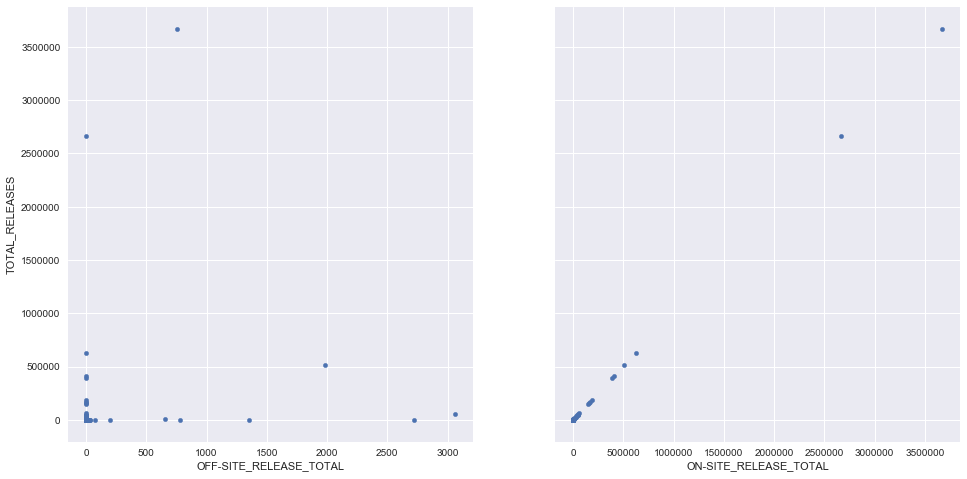

In [41]:
fig, axs = plt.subplots(1, 2, sharey=True)
NC14.plot(kind='scatter', x='OFF-SITE_RELEASE_TOTAL', y='TOTAL_RELEASES', ax=axs[0], figsize=(16, 8))
NC14.plot(kind='scatter', x='ON-SITE_RELEASE_TOTAL', y='TOTAL_RELEASES', ax=axs[1])


 As I expected the correlation between off-site releases and total releases would be minimal compared to the correlation between on-site releases and total releases.

In [42]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
offtotal=NC14['OFF-SITE_RELEASE_TOTAL']
# create a fitted model in one line
lmoff = smf.ols(formula='TOTAL_RELEASES ~ offtotal', data=NC14).fit()

# print the coefficients
lmoff.params

Intercept    57193.851468
offtotal       136.243650
dtype: float64

In [43]:
57193.851468 + 136.243650* 500

125315.67646799999

If a facility had 500 pounds of off-site releases, prediction on total releases would be about 125315 pounds

In [44]:
lmoff.pvalues

Intercept    0.098248
offtotal     0.096633
dtype: float64

In [45]:
lmoff.rsquared

0.020463499149780406

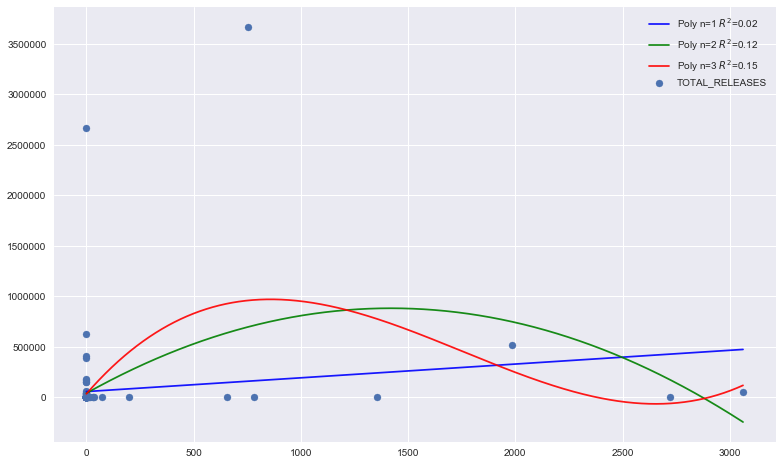

In [46]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(NC14['OFF-SITE_RELEASE_TOTAL'], NC14['TOTAL_RELEASES'])

df1 = NC14

poly_1 = smf.ols(formula='TOTAL_RELEASES ~ 1 + offtotal', data=NC14).fit()

x=pd.DataFrame({'offtotal': np.linspace(NC14['OFF-SITE_RELEASE_TOTAL'].min(), NC14['OFF-SITE_RELEASE_TOTAL'].max(), 4000)})

plt.plot(x.offtotal, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='TOTAL_RELEASES ~ 1 + offtotal + I(offtotal ** 2.0)', data=NC14).fit()
plt.plot(x.offtotal, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='TOTAL_RELEASES ~ 1 + offtotal + I(offtotal ** 2.0) + I(offtotal ** 3.0)', data=NC14).fit()
plt.plot(x.offtotal, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

None of the models seem to "fit" the data for off site release values as the off site values have very little correlation to the total release values

In [47]:
ontotal=NC14['ON-SITE_RELEASE_TOTAL']
# create a fitted model in one line
lmon = smf.ols(formula='TOTAL_RELEASES ~ ontotal', data=NC14).fit()

# print the coefficients
lmon.params

Intercept    89.887548
ontotal       1.000190
dtype: float64

In [48]:
89.887548 + 1.000190 * 75000

75104.137548

In [49]:
lmon.pvalues

Intercept    0.042176
ontotal      0.000000
dtype: float64

If a facility had 75000 pounds of on-site releases, prediction on total releases would be about 75104 pounds

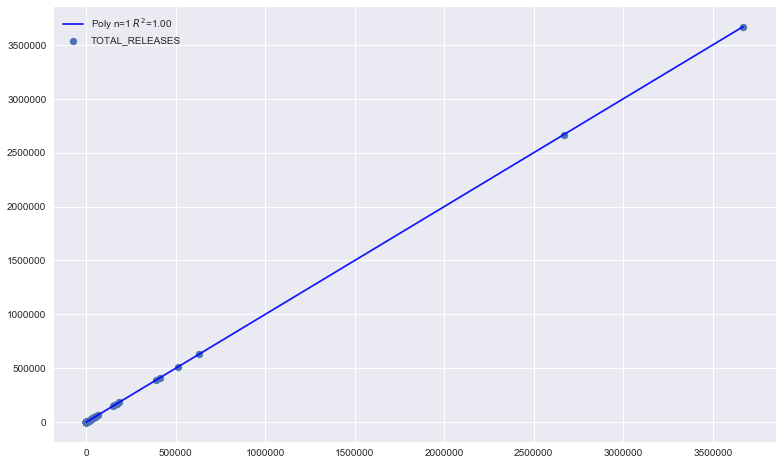

In [50]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(NC14['ON-SITE_RELEASE_TOTAL'], NC14['TOTAL_RELEASES'])

df1 = NC14

poly_1 = smf.ols(formula='TOTAL_RELEASES ~ 1 + ontotal', data=NC14).fit()

x=pd.DataFrame({'ontotal': np.linspace(NC14['ON-SITE_RELEASE_TOTAL'].min(), NC14['ON-SITE_RELEASE_TOTAL'].max(), 4000)})

plt.plot(x.ontotal, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

plt.legend()

As you can clearly see that this lineer regression model for on-site releases as related to total releases has a very good best fit line which would likely allow you to accurately predict a facilities total release values based on its on-site release totals